/tmp/ipykernel_3268373/719714607.py:9: RuntimeWarning: invalid value encountered in power
  y1 = 100*(pow(4,a) * pow(x,(a - 1)) * pow((1 - x),(a - 1)))


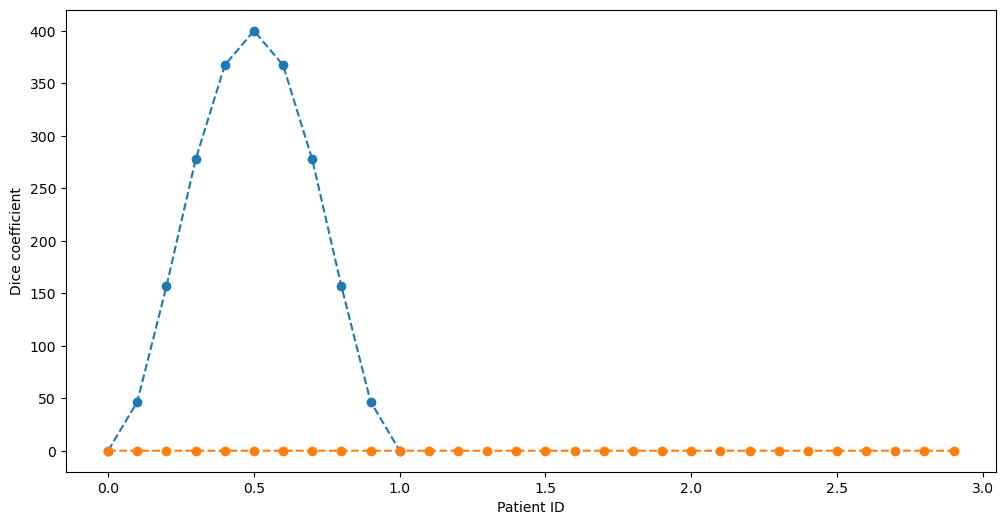

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0,3,0.1);

a =3.1
y1 = 100*(pow(4,a) * pow(x,(a - 1)) * pow((1 - x),(a - 1)))
ss = 0.01
y2 = 1/np.sqrt(2)*ss*np.exp(-x*x/(2*ss**2))
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Patient ID')
ax1.set_ylabel('Dice coefficient')
ax1.tick_params(axis='y')
ax1.plot(x, y1, linestyle="--", marker="o", label='Dice coefficient')
ax1.plot(x, y2, linestyle="--", marker="o", label='Dice coefficient')
#ax1.set_ylim(0, 1.0)


plt.show() 

30


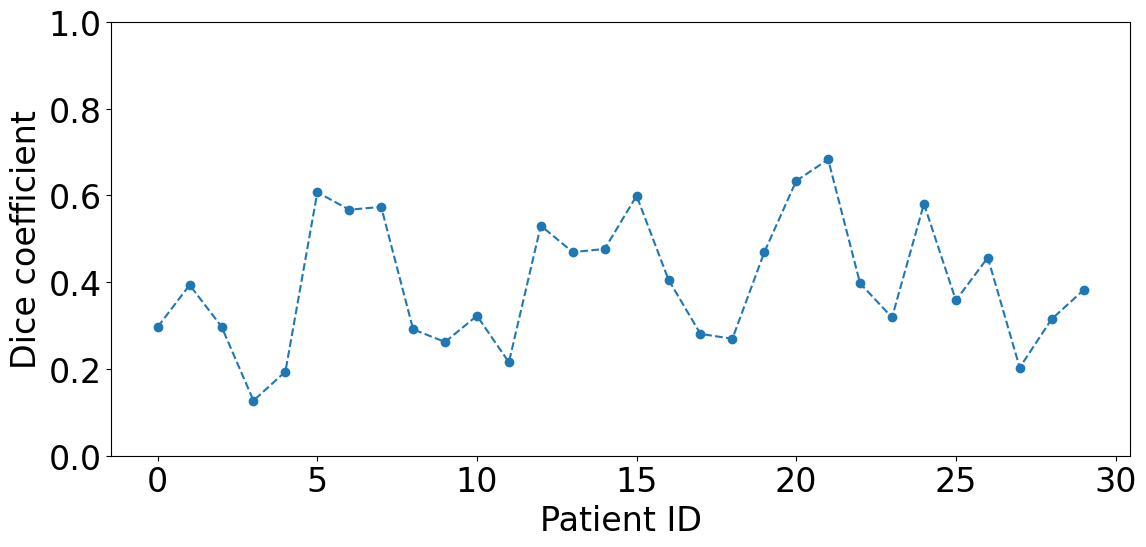

1131799
0.405613


In [3]:

savePath = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results'

results = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results/10_1_22_liver_dices.txt'
results = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results/liver_dices.txt'
hcc_results = pd.DataFrame(pd.read_csv(results,sep='\t',skiprows=1, names=['patientID', 'Dice', 'none']))
#print(hcc_results)

Liver_dice = hcc_results['Dice']
id = hcc_results['patientID']


patientID = hcc_results.patientID.unique()
Liver_dice = []
Liver_haus95 = []
print(len(patientID))
for patid in patientID:
    tmp = hcc_results.loc[hcc_results['patientID'] == patid]
    Liver_dice.append(np.mean(tmp['Dice']))
    tmp = hcc_results.loc[hcc_results['patientID'] == patid]

id =patientID
yDice = [x for _, x in sorted(zip(id, Liver_dice))]
yHaus95 = [x for _, x in sorted(zip(id, Liver_haus95))]
x = range(len(id))

plt.rcParams['font.size'] = '24'
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Patient ID')
ax1.set_ylabel('Dice coefficient')
ax1.tick_params(axis='y')
ax1.plot(x, yDice, linestyle="--", marker="o", label='Dice coefficient')
ax1.set_ylim(0, 1.0)

fig.tight_layout()

#ax2.set_title(titlename)

plt.savefig(savePath + "/" + 'QIS_detection_stats.png', bbox_inches="tight")
plt.show() 
print(id[16])
print(yDice[16])

In [4]:
import numpy as np

headers = ['QIS-NET', "Mean", "Median", "Min", "Max", "Std"]

diceList = ["Dice Similarity Coefficient (" + 'QIS-NET' + ")", np.mean(yDice), np.median(yDice),  min(yDice), max(yDice), np.std(yDice)]
data = pd.DataFrame([ diceList], columns=headers)

data.to_csv(savePath + "/" + 'QIS' +'_anay' + '.csv', mode='a', index=False, header=False )

print(data)

                                 QIS-NET      Mean    Median       Min  \
0  Dice Similarity Coefficient (QIS-NET)  0.399336  0.387799  0.127094   

       Max       Std  
0  0.68314  0.145904  


In [6]:
display(Liver_dice)

[0.521419,
 0.334722,
 0.382671,
 0.444976,
 0.420464,
 0.318734,
 0.363645,
 0.362741,
 0.396573,
 0.341016,
 0.45819,
 0.38242,
 0.337693,
 0.341524,
 0.349495,
 0.484808,
 0.382131,
 0.28012,
 0.368191,
 0.372603,
 0.31936,
 0.46015,
 0.427234,
 0.374026,
 0.356922,
 0.331416,
 0.36513,
 0.378523,
 0.266867,
 0.453745,
 0.409894,
 0.284997,
 0.356358,
 0.244898]